<p align="center">
<img src="https://visme.co/blog/wp-content/uploads/climate-change-facts-header-wide.gif"> 
</p>

# <span style="color: palegreen;"> It's Only A Matter of Time* </span>

#### <span style="font-family:cursive;"> **Authors:**  [Jiji Craynock](https://github.com/DataOnATangent) & [Rafael Ferreira](https://github.com/Astroraf) </span>

<a name="overview"></a>  
## <span style="color: deepskyblue;">Overview </span>
By now most of us realize that rising CO2 levels are a problem. Scientist warn that if we do not manage to maintain C02 levels below 450 ppm we will be unable to stabilizing the average global temperature at a 2°C increase over the pre-industrial period. Sceintist have declared that 2°C of global warming would have disastrous consequences and could cause major dislocations for civilization. For our project we use weekly CO2 measurement data from NOOA to predict future CO2 levels. We used <span style="color: tomato;"> THE MODEL WE CHOSE to predict that by over the course of TIME PREDICTED FOR CO2 level will rise to AMOUNT IT WILL RISE TO. This should impress upon everyone the importance to taking our conservation seriously and increasing our efforts to stop and ideally reverse global warming. </span>

[Source](https://sustainabilityadvantage.com/2014/01/07/co2-why-450-ppm-is-dangerous-and-350-ppm-is-safe/) 

<p align="center">
  <img width="560" height="400" src="http://nerdist.com/wp-content/uploads/2014/11/NASA-CO2.gif">
</p>

<a name="btt"></a> 
## <span style="color: thistle;">Table of Contents </span>

1. [Overview](#overview) 
2. [Business Problem](#business_problem)
3. [Data_Understanding](#data_understanding) 
4. [Data Preperation](#data_preparation)
    1. [Preprocessing](#preprocessing) 
    2. [Exploratory Data Analysis](#EDA) 
    3. [Model Preperation](#model_preperation) 
5. [Data Modeling](#data_modeling)   
    1. [ARMA](#arma) 
    2. [ARIMA](#arima) 
    3. [SARIMAX](#sarimax) 
6. [Evaluation](#evaluation)    
7. [Conclusion](#conclusion)  

<a name="business_problem"></a>  

## <span style="color: tomato;">Business Problem</span> 

[Back to Top](#btt)  


Most of us never consider how fortunate we are that Earth is a habitable planet. We take take for granted that all the aspects that need to go right for life as we know it to exist. Chief among those is the chemical make up of Earth's atmosphere. Earth’s atmosphere is resilient to many of the changes humans have imposed on it but atmospheric scientist say that doesn’t necessarily mean that our society is. Humans have increased the amount of carbon dioxide by as much as 45% since the beginning of the Industrial Age and while our atmosphere will survive it seems unlikely that many, if any, societies will survie the impact. 

Carbon Dioxide or CO2 is one of the primary greenhouse gases on Earth. Greenhouse gases have the ability to trap heat(thermal radiation) that the Earth would otherwise emit to space.
CO2 is an important gas for life on the planet and helps maintain our atmosphere. However, sharp changes in CO2 level affect the atmospheric balance and lead to adverse effect on global climate. Currently, CO2 levels are higher than they have ever been as can be seen in the image below. Although we now understand the human activity impact on CO2 concentrations in the atmosphere, many questions remain unanswered. For our project we will be explore data containing the weekly average measurement of CO2 in part per million as collect by NOAA at Mauna Loa with the purpose of predicting future averages. Our hope is that with this information we can provide insight into how much time we have left to adress this issue and highlist the need for swift action before it is too late.

<p align="center">
  <img width="760" height="600" src="https://climate.nasa.gov/system/resources/detail_files/24_co2-graph-061219-768px.jpg">
</p>


[Source](https://climate.nasa.gov/news/2915/the-atmosphere-getting-a-handle-on-carbon-dioxide/)  

<a name="data_understanding"></a> 
## <span style="color: gold;">Data Understanding</span> 
[Back to Top](#btt) 

As previously stated, the data used for this project is weekly CO2 measurement data collect by NOAA in Mauna Loa, Hawaii. The data contains records dating back to the week of May 19th, 1974 through January 24th, 2021. It describe the measurements in ppms of CO2, the data collected, the number of days in a given week used for the average, the differnce in average versus 1-year and 10 years ago, and the increase since the year 1800. Our target variable will be the weekly average.


[Link to Data](https://www.esrl.noaa.gov/gmd/ccgg/trends/weekly.html)  


<a name="data_preparation"></a>  
## <span style="color: palegreen;"> Data Preparation </span> 

[Back to Top](#btt) 

Our data is largely complete in terms of our target variable. However, since we wish to confirm that our averages are at least largely representive we will also be looking at the ndays column which describes the number of days per week used for the average. We will also maintain the increase since 1800 column in order to have a deep understanding of scale as we explore the data.

<a name="preprocessing"></a> 
### <span style="color: deepskyblue;">Preprocessing </span>  

[Back to Top](#btt) 

In this section we will take care to clean up and drop the required data for use in our data exploration and modeling process. 

In [45]:
#Import necessary packages
import numpy as np
import pandas as pd 
import warnings
warnings.filterwarnings('ignore')
import itertools
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
sns.set_theme(style="white")
%matplotlib inline
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf 
import matplotlib.ticker as ticker
import matplotlib.cm as cm


In [46]:
#Load data and print summary statistics
weekly = pd.read_csv('co2_weekly_mlo.csv') 
weekly.describe()

,year,month,day,decimal,average,ndays,1 year ago,10 years ago,increase since 1800
count,2441.000000,2441.000000,2441.000000,2441.000000,2441.000000,2441.000000,2441.000000,2441.000000,2441.000000
mean,1997.259730,6.535846,15.719787,1997.760793,357.912372,5.868906,327.778267,57.278693,79.991254
std,13.510793,3.451129,8.802066,13.507458,119.562459,1.372752,229.377689,564.495447,96.204762
min,1974.000000,1.000000,1.000000,1974.379500,-999.990000,0.000000,-999.990000,-999.990000,-999.990000
25%,1986.000000,4.000000,8.000000,1986.069900,346.980000,5.000000,345.490000,331.190000,66.900000
50%,1997.000000,7.000000,16.000000,1997.760300,364.870000,6.000000,363.120000,349.780000,84.130000
75%,2009.000000,10.000000,23.000000,2009.450700,387.580000,7.000000,385.760000,368.130000,107.690000
max,2021.000000,12.000000,31.000000,2021.141100,417.670000,7.000000,415.530000,393.670000,136.490000


In [47]:
#Takes a look at the last 5 columns in our data set
weekly.tail()

,year,month,day,decimal,average,ndays,1 year ago,10 years ago,increase since 1800
2436,2021,1,24,2021.0644,416.01,7,413.96,391.68,135.50
2437,2021,1,31,2021.0836,417.12,7,414.50,392.19,136.49
2438,2021,2,7,2021.1027,416.92,7,414.91,391.64,136.18
2439,2021,2,14,2021.1219,416.51,7,414.12,391.92,135.67
2440,2021,2,21,2021.1411,416.31,7,413.96,392.32,135.36


In [48]:
#Takes a look at the first 5 columns in our data set
weekly.head()

,year,month,day,decimal,average,ndays,1 year ago,10 years ago,increase since 1800
0,1974,5,19,1974.3795,333.37,5,-999.99,-999.99,50.40
1,1974,5,26,1974.3986,332.95,6,-999.99,-999.99,50.06
2,1974,6,2,1974.4178,332.35,5,-999.99,-999.99,49.60
3,1974,6,9,1974.4370,332.20,7,-999.99,-999.99,49.65
4,1974,6,16,1974.4562,332.37,7,-999.99,-999.99,50.06


In [49]:
#Check data for null values 
weekly.isna().sum()

year                   0
month                  0
day                    0
decimal                0
average                0
ndays                  0
1 year ago             0
10 years ago           0
increase since 1800    0
dtype: int64

In [50]:
#Make inital changes to data including: 
weekly['Date'] = pd.to_datetime(weekly[['year', 'month', 'day']])  #Creating a data column
weekly['average'] = weekly['average'].abs()  #Making all numbers in average column positive by changing them to absolute values
weekly['increase since 1800'] = weekly['increase since 1800'].abs()  #Making all numbers in increase since 1800 column positive by changing them to absolute values
weekly.drop(columns = ['decimal', '1 year ago', '10 years ago'], inplace = True) #Dropping unneeded columns 

>We started out prepocessing by looking at the data, adding a data column, changing out average to absolute values, and dropping columns we will not be using. Having completed initial clean up, we now move on addressing the missing values in our averages column and increase since 1800 column. We discovered that while there are no missing values, the data collectors have filled in missing values with 999.99. These values will be addressed by using the average of the values for the index rows before and after the missing value(s).

In [51]:
#Look at which rows have 999.99 values or above the mean values for the increase since 1800 column
weekly1 = weekly[weekly['increase since 1800']> 500] 
weekly1

,year,month,day,average,ndays,increase since 1800,Date
72,1975,10,5,999.99,0,999.99,1975-10-05
81,1975,12,7,999.99,0,999.99,1975-12-07
82,1975,12,14,999.99,0,999.99,1975-12-14
83,1975,12,21,999.99,0,999.99,1975-12-21
84,1975,12,28,999.99,0,999.99,1975-12-28
110,1976,6,27,999.99,0,999.99,1976-06-27
409,1982,3,21,999.99,0,999.99,1982-03-21
412,1982,4,11,999.99,0,999.99,1982-04-11
413,1982,4,18,999.99,0,999.99,1982-04-18
481,1983,8,7,999.99,0,999.99,1983-08-07


In [52]:
#Replace the values with the average for the rows above and below the value(s) that need to changed
inc1975=weekly.loc[[71, 73], 'increase since 1800'].mean() 
weekly.loc[[72, 81, 82, 83, 84], 'increase since 1800'] = inc1975 

inc1976=weekly.loc[[109,111], 'increase since 1800'].mean() 
weekly.loc[[110], 'increase since 1800'] = inc1976 

inc1982=weekly.loc[[411, 414], 'increase since 1800'].mean() 
weekly.loc[[409, 412, 413], 'increase since 1800'] = inc1982 

inc1983=weekly.loc[[480, 482], 'increase since 1800'].mean() 
weekly.loc[[481], 'increase since 1800'] = inc1983

inc1984=weekly.loc[[514, 519], 'increase since 1800'].mean() 
weekly.loc[[515, 516, 517, 518], 'increase since 1800'] = inc1984

inc2005=weekly.loc[[1638, 1640], 'increase since 1800'].mean() 
weekly.loc[[1639], 'increase since 1800'] = inc2005 

inc2008=weekly.loc[[1779, 1783], 'increase since 1800'].mean() 
weekly.loc[[1780, 1781, 1782], 'increase since 1800'] = inc2008

In [53]:
#Look at which rows have 999.99 values or above the mean values for the average column
weekly2 = weekly[(weekly['average']> 500) | (weekly['average'] < 175)] 
weekly2

,year,month,day,average,ndays,increase since 1800,Date
72,1975,10,5,999.99,0,51.570,1975-10-05
81,1975,12,7,999.99,0,51.570,1975-12-07
82,1975,12,14,999.99,0,51.570,1975-12-14
83,1975,12,21,999.99,0,51.570,1975-12-21
84,1975,12,28,999.99,0,51.570,1975-12-28
110,1976,6,27,999.99,0,52.050,1976-06-27
409,1982,3,21,999.99,0,61.575,1982-03-21
412,1982,4,11,999.99,0,61.575,1982-04-11
413,1982,4,18,999.99,0,61.575,1982-04-18
481,1983,8,7,999.99,0,63.685,1983-08-07


In [54]:
#Replace the values with the average for the rows above and below the value(s) that need to changed for the average column
ppm1975=weekly.loc[[71, 85], 'average'].mean() 
weekly.loc[[72, 81, 82, 83, 84], 'average'] = ppm1975  

ppm1976=weekly.loc[[109, 111], 'average'].mean() 
weekly.loc[[110], 'average'] = ppm1976  

ppm1982=weekly.loc[[408, 414], 'average'].mean() 
weekly.loc[[409, 412, 413], 'average'] = ppm1982

ppm1983=weekly.loc[[480, 482], 'average'].mean() 
weekly.loc[[481], 'average'] = ppm1983

ppm1984=weekly.loc[[514, 519], 'average'].mean() 
weekly.loc[[515, 516, 517, 518], 'average'] = ppm1984

ppm2005=weekly.loc[[1638, 1640], 'average'].mean() 
weekly.loc[[1639], 'average'] = ppm2005

ppm2008=weekly.loc[[1779, 1783], 'average'].mean() 
weekly.loc[[1780, 1781, 1782], 'average'] = ppm2008

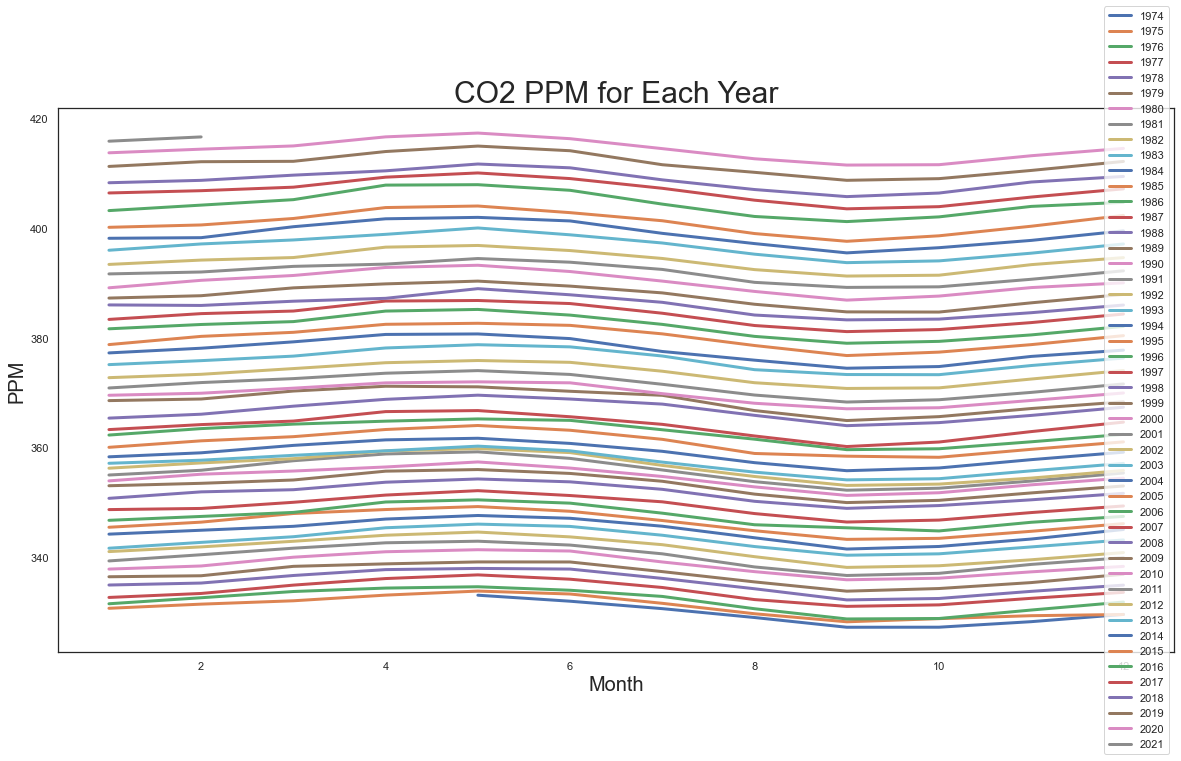

In [55]:
#Graph the average column to confirm outliers hav e been addressed
season = weekly
season['Date'] = weekly.Date
season['year'] = weekly['Date'].dt.year
season['month'] = weekly['Date'].dt.month
spivot = pd.pivot_table(season, index='month', columns = 'year', values = 'average', aggfunc=np.mean)
spivot.plot(figsize=(20,10), linewidth=3)
plt.legend(loc = 'right')
plt.title('CO2 PPM for Each Year', fontsize = 30)
plt.ylabel('PPM', fontsize = 20) 
plt.xlabel('Month', fontsize = 20)
plt.show()

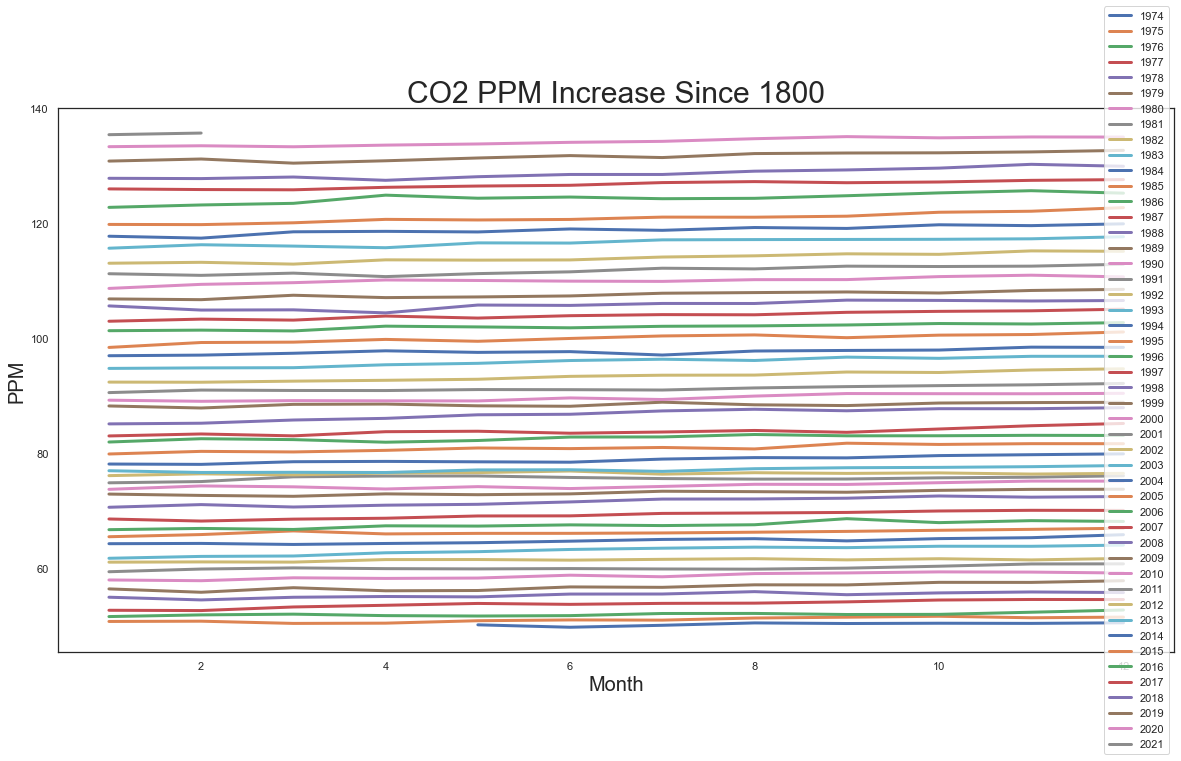

In [56]:
#Graph the increase since 1800 to confirm outliers have been addressed
season = weekly
season['Date'] = weekly.Date
season['year'] = weekly['Date'].dt.year
season['month'] = weekly['Date'].dt.month
spivot = pd.pivot_table(season, index='month', columns = 'year', values = 'increase since 1800', aggfunc=np.mean)
spivot.plot(figsize=(20,10), linewidth=3)
plt.legend(loc = 'right')
plt.title('CO2 PPM Increase Since 1800', fontsize = 30)
plt.ylabel('PPM', fontsize = 20) 
plt.xlabel('Month', fontsize = 20)
plt.show()

> From the two charts above we can see that there is fairly consitent year over year growth in CO2 emissions. As a result we know that our data does not have stationarity. However this does confirm that we no longer have missing value outliers. 

In [57]:
#Rerun the summary statistics
weekly.describe()

,year,month,day,average,ndays,increase since 1800
count,2441.000000,2441.000000,2441.000000,2441.000000,2441.000000,2441.000000
mean,1997.259730,6.535846,15.719787,367.860051,5.868906,87.870969
std,13.510793,3.451129,8.802066,24.439001,1.372752,24.348886
min,1974.000000,1.000000,1.000000,326.720000,0.000000,49.600000
25%,1986.000000,4.000000,8.000000,347.110000,5.000000,66.950000
50%,1997.000000,7.000000,16.000000,364.960000,6.000000,84.290000
75%,2009.000000,10.000000,23.000000,387.580000,7.000000,107.690000
max,2021.000000,12.000000,31.000000,417.670000,7.000000,136.490000


In [58]:
len(weekly['Date'])

2441

<a name="EDA"></a> 
### <span style="color: deepskyblue;">EDA</span>  

[Back to Top](#btt) 

Having confirmed that all intial issue have been addressed. We not move on to further exploratory data analysis. We saw above that our data increases rather steadily year over year, incating a lack of stationarity that will need to be addressed at a later point.

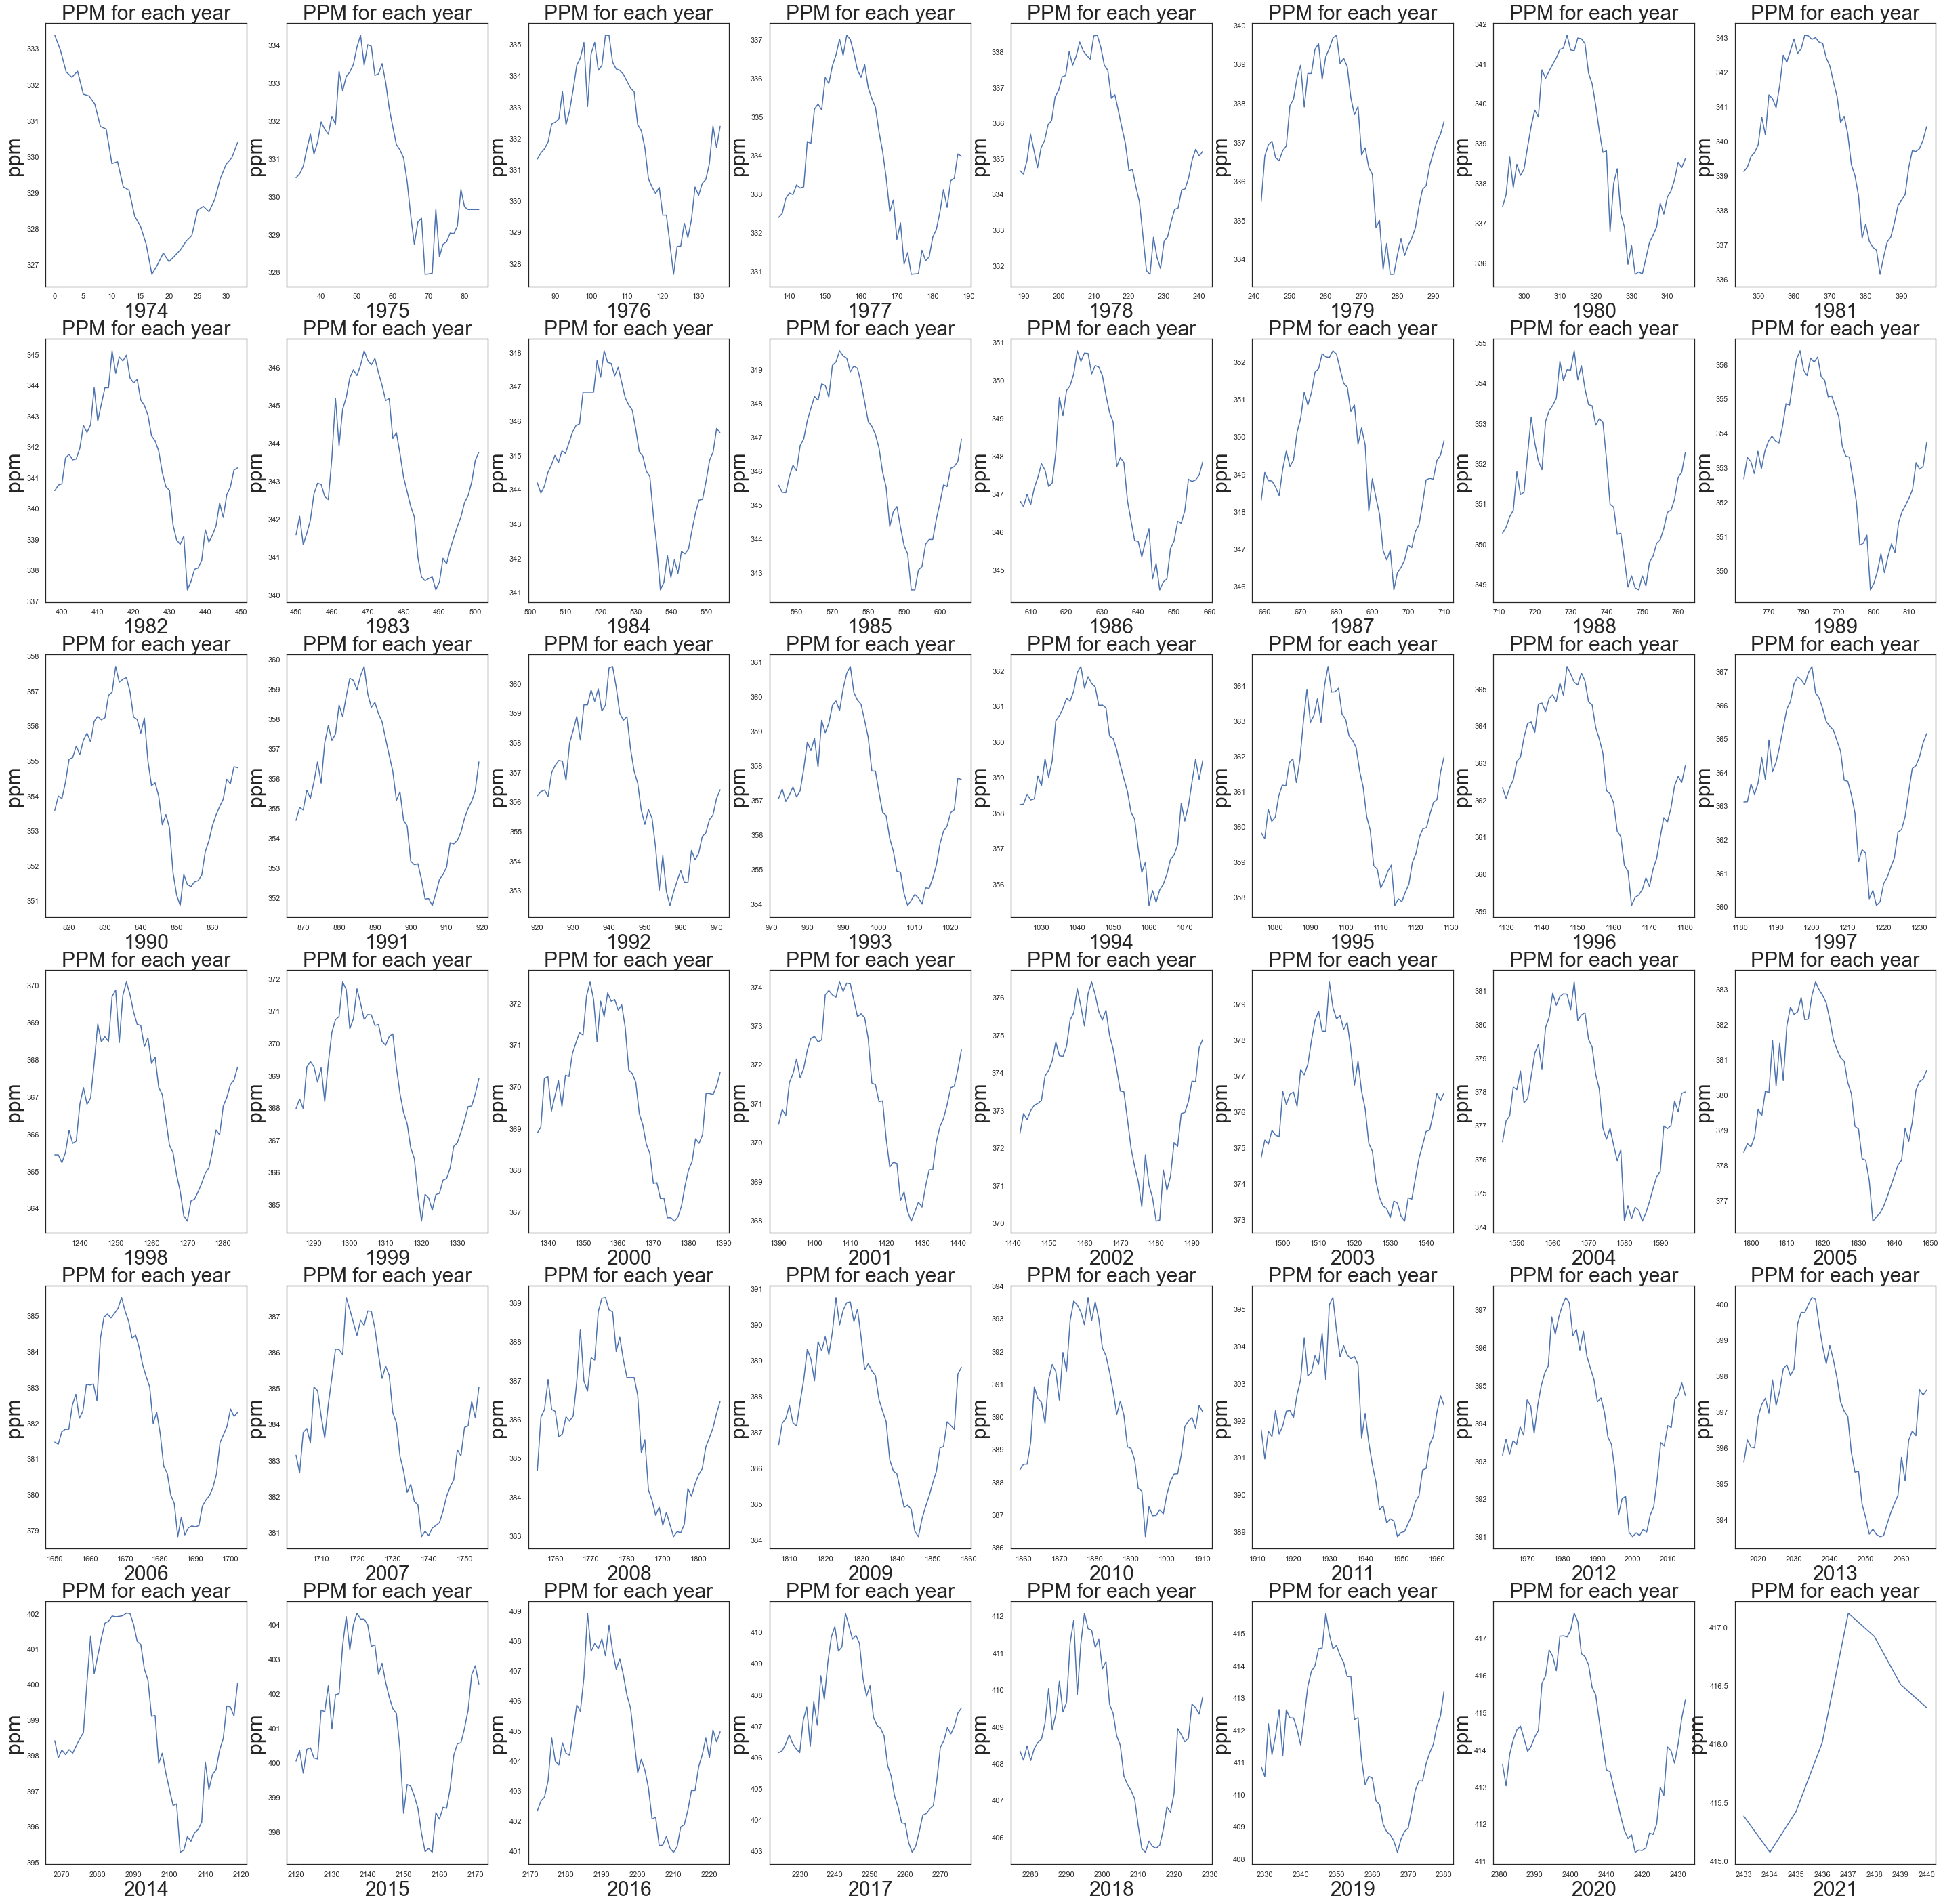

In [59]:
#Plots each each year individually 
years = weekly['year'].unique()

fig, ax = plt.subplots(nrows = 6, ncols = 8, figsize = (50,50))

for index, year in enumerate(years):
    i = index // 8 
    j = index % 8
    current_ax = ax[i][j]
    weekly.loc[weekly['year']  == year, 'average'].plot(ax = current_ax)
    current_ax.set_title('PPM for each year', fontsize = 30)
    current_ax.set_xlabel(year, fontsize = 30)
    current_ax.set_ylabel('ppm', fontsize = 30)

>From these charts we can see that there seasonality since every chart has a very similar shape. 

<Figure size 432x288 with 0 Axes>

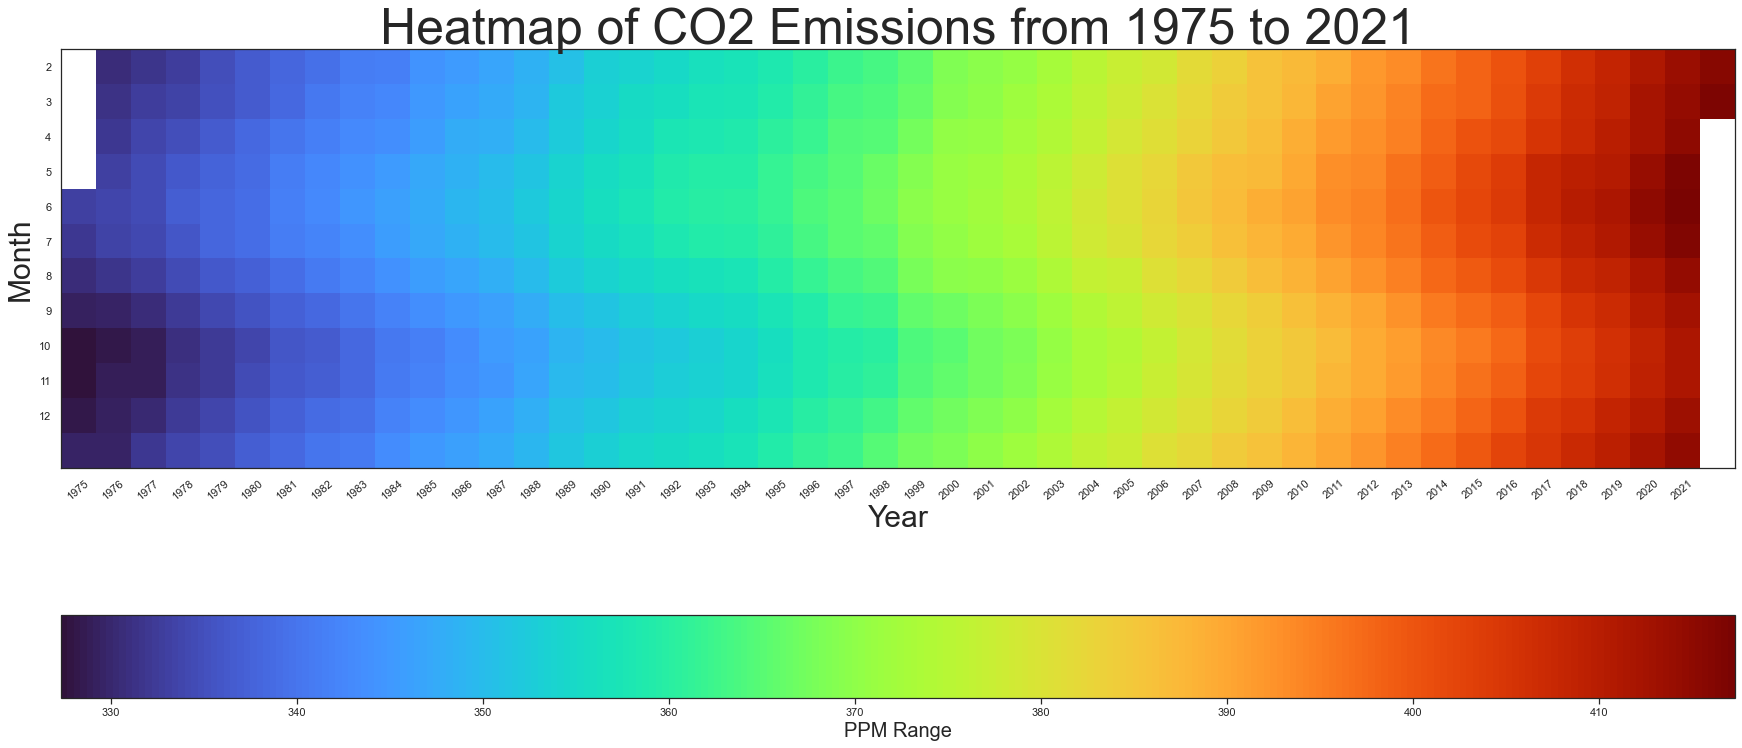

In [60]:
#Creates a heatmap of co2 emissions
co2_matrix = weekly.groupby(['year', 'month'])['average'].mean().unstack().T

fig = plt.figure()
fig, ax = plt.subplots(1,1, figsize=(30,18))
heatplot = ax.imshow(co2_matrix, cmap='turbo')
ax.set_xticklabels(co2_matrix.columns)
ax.set_yticklabels(co2_matrix.index)

tick_spacing = 1
ax.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
ax.yaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
ax.set_title("Heatmap of CO2 Emissions from 1975 to 2021", fontsize = 50)
ax.tick_params(axis='x', labelrotation = 40)
ax.set_xlabel('Year', fontsize = 30)
ax.set_ylabel('Month', fontsize = 30)  

#legend
cbar = fig.colorbar(heatplot, orientation='horizontal')
cbar.set_label('PPM Range', fontsize = 20);


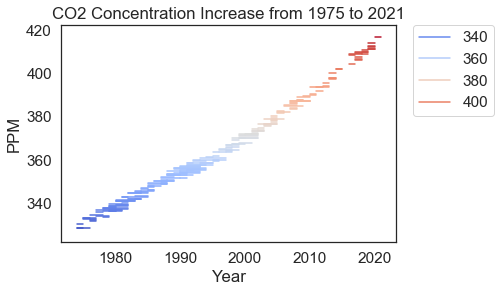

In [64]:
#Lineplot of CO2 Trend Line
sns.set_context("notebook", font_scale=1.4)
sns.lineplot(x = 'year', y = 'average', data = weekly, hue = 'average', palette='coolwarm')
plt.ylabel('PPM') 
plt.xlabel('Year')
plt.title('CO2 Concentration Increase from 1975 to 2021')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.);

> The above two charts confirm what we saw in preproccessing which is that there is a definite trend upward in the data. 

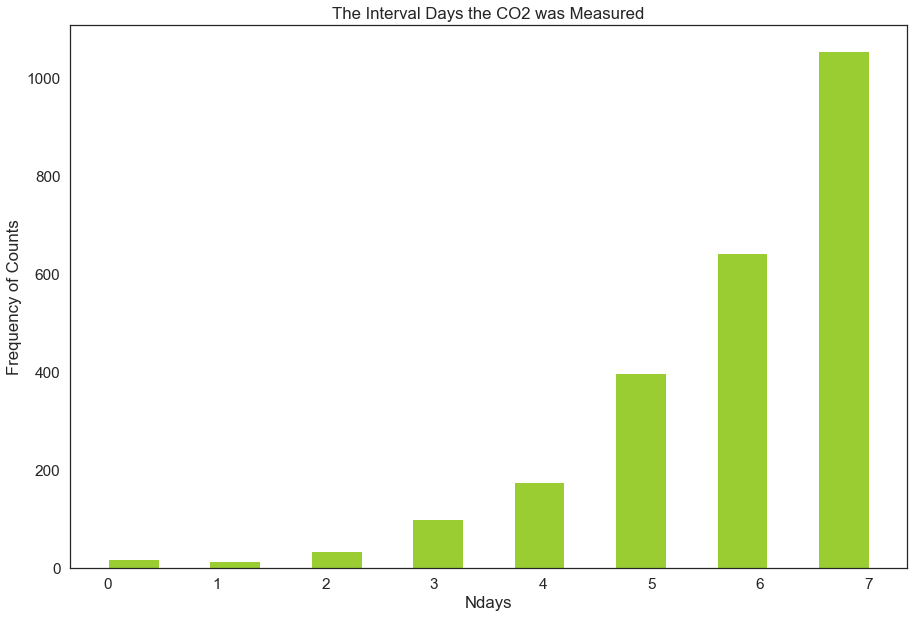

In [65]:
#Graph of Distribution of Collection Days
fig, plt.figure(figsize = (15,10))
plt.hist(weekly.ndays, bins = 15, align='mid', color = 'yellowgreen' )
plt.xlabel('Ndays')
plt.ylabel('Frequency of Counts')
plt.title('The Interval Days the CO2 was Measured')
plt.show()

>We can from the chart above that for the most part most weekly averages are based on 6-7 days.

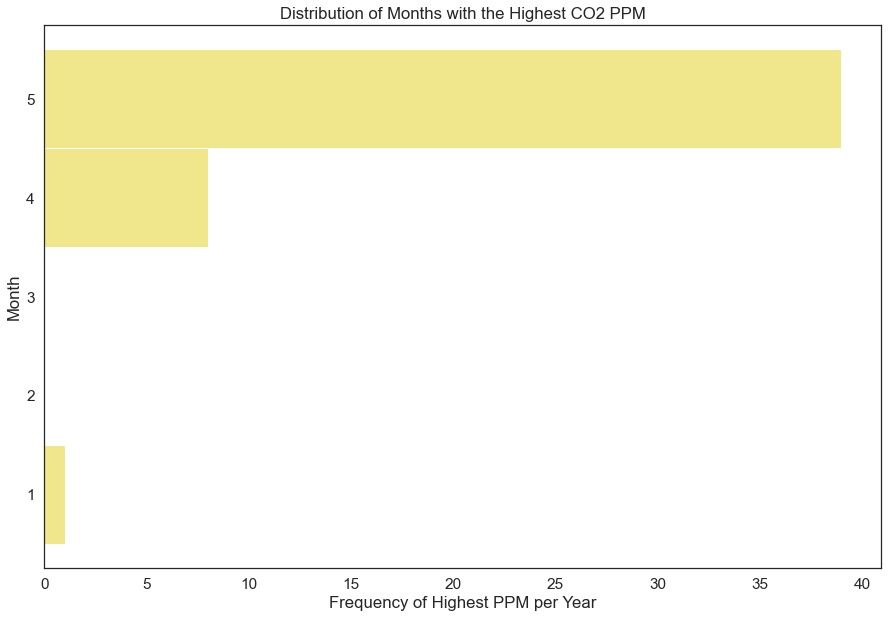

In [67]:
#Distribution of Months with highest CO2 Emissions per year
month_high = weekly.loc[weekly.groupby("year")["average"].idxmax()]
fig = plt.figure(figsize = (15, 10))
plt.hist(month_high.month, bins = 5, align = 'left', orientation='horizontal', color='khaki')
plt.title('Distribution of Months with the Highest CO2 PPM')
plt.ylabel('Month')
plt.xlabel('Frequency of Highest PPM per Year')
plt.show();

>This chart indicates that May is the month that most frequently has the highest CO2 emissions. We have learned that in the northern fall, winter, and early spring, plants and soils give off CO2, causing levels to rise through May. The continued increase in CO2 and the seasonal cycle are the main features of what is known as the Keeling Curve. 
[Source](https://scitechdaily.com/may-2020-had-the-highest-monthly-atmospheric-co2-reading-ever-recorded/#:~:text=In%20the%20northern%20fall%2C%20winter,vary%20by%20a%20small%20degree) 

#### <span style="color: deepskyblue;">EDA Findings </span> 

[Back to Top](#btt) 

 We now know our data has both a time function trend and seasonality that must be accounted for in preperation for modeling. In the next section, we will look at the rolling mean for multiple windows to find out which is best way to account for these factors.

<a name="model_preparation"></a> 
### <span style="color: deepskyblue;">Model Preperation</span> 

[Back to Top](#btt) 

In [19]:
#We start by setting up variables and alternate dataframes to work form 
avg_weekly = weekly.copy()
avg_weekly = avg_weekly.drop(columns = ['year', 'month', 'day', 'ndays']) 
avg_weekly.set_index('Date', inplace = True) 
avg_week = avg_weekly.copy()
inc_week = avg_weekly.copy() 
avg_week = avg_week.drop(columns = ['increase since 1800'])
inc_week = inc_week.drop(columns = ['average']) 
month_mean = avg_weekly['average'].resample('M').mean()
month_std = avg_weekly['increase since 1800'].resample('M').std()

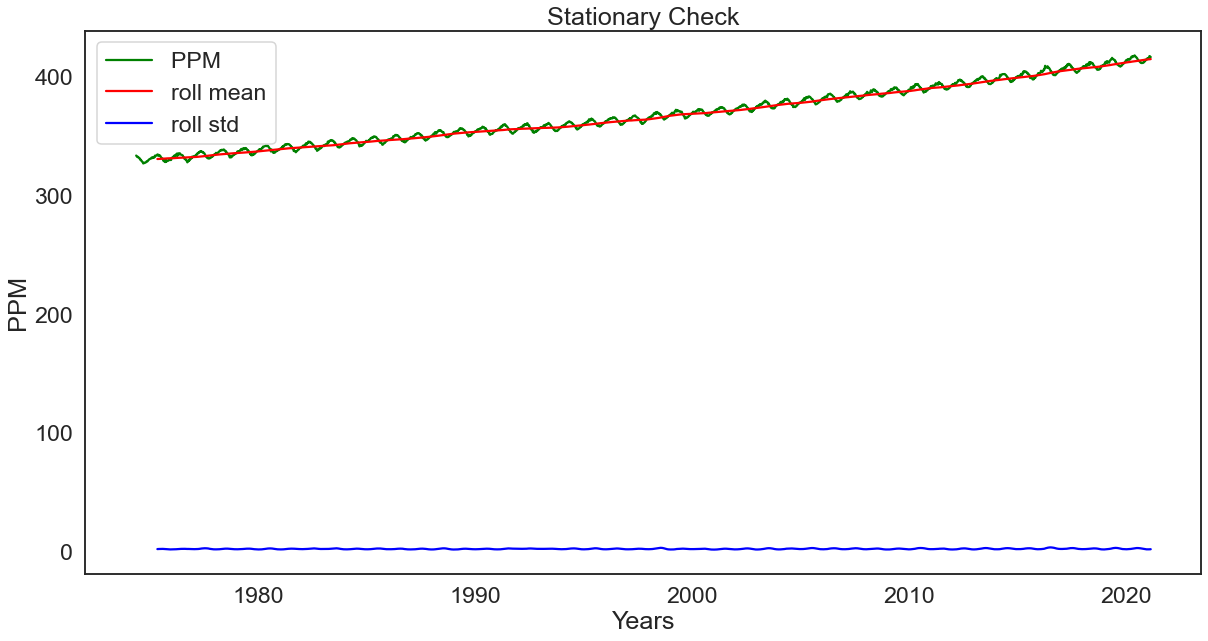

Results of Dickey-Fuller Test: 

Test Statistic                    0.265961
p-value                           0.975728
#Lags Used                       27.000000
Number of Observations Used    2413.000000
Critical Value (1%)              -3.433063
Critical Value (5%)              -2.862739
Critical Value (10%)             -2.567408
dtype: float64


In [20]:
#Here we define a function that will help us confirm when we have succesfully removed the seasonlity from our data
def stats_check(df, winsiz, column):
    
    
    roll_mean = df.rolling(window = winsiz, center = False).mean()
    roll_std = df.rolling(window = winsiz, center = False).std()
    
    
    dftest = adfuller(df[column])
    
    
    fig = plt.figure(figsize = (20,10))
    plt.plot(df, color = 'green', label = 'PPM ')
    plt.plot(roll_mean, color = 'red', label = 'roll mean')
    plt.plot(roll_std, color = 'blue', label = 'roll std')
    plt.legend(loc ='best')
    plt.title('Stationary Check')
    plt.xlabel('Years')
    plt.ylabel('PPM')
    plt.show()
    

    print('Results of Dickey-Fuller Test: \n')

    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', 
                                             '#Lags Used', 'Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)
    
    return None 

stats_check(avg_week, 52, 'average')

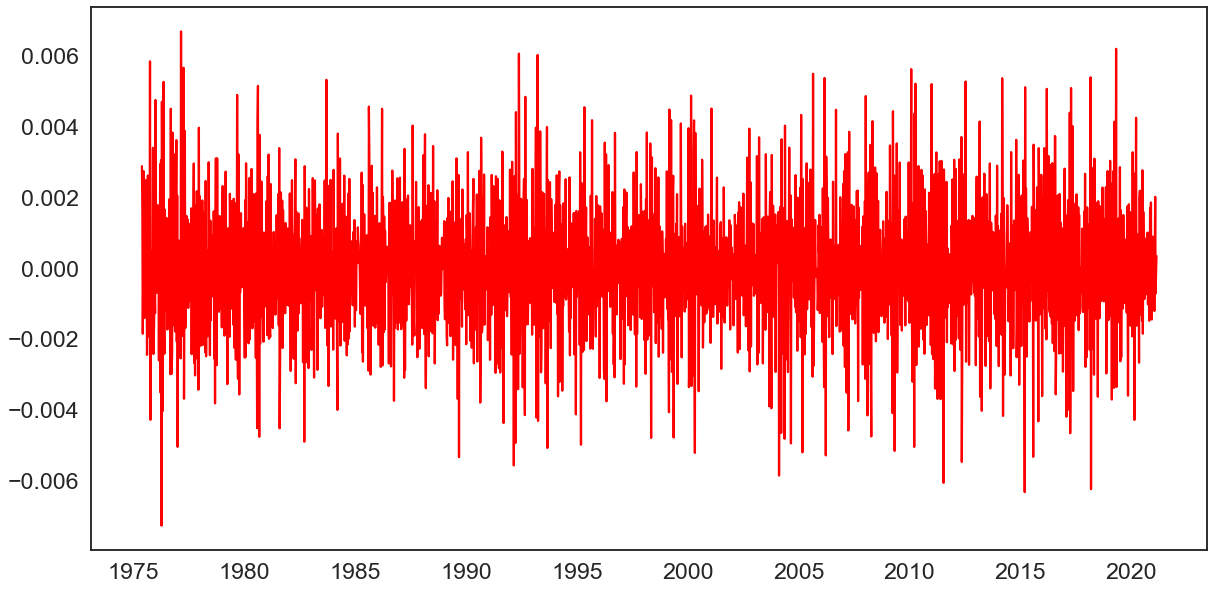

In [21]:
#We will use a log function to remove the tend and seasonality
avg_week_log = np.log(avg_week).diff(52).diff(1)
fig = plt.figure(figsize = (20,10))
plt.plot(avg_week_log, color='red');

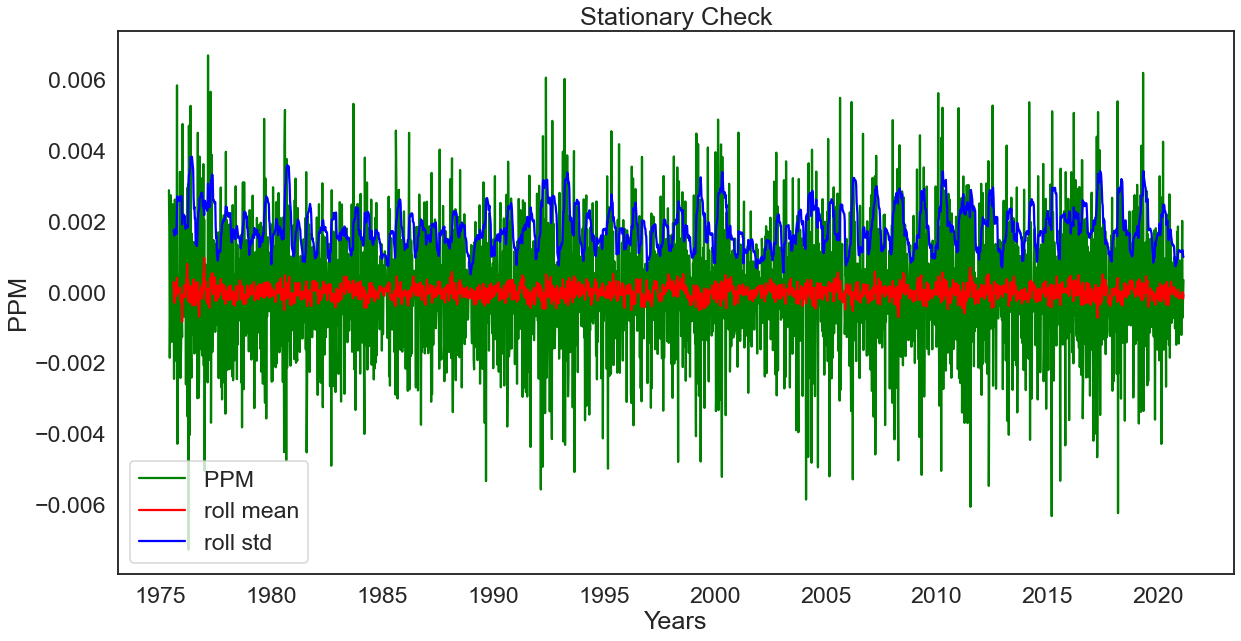

Results of Dickey-Fuller Test: 

Test Statistic                -1.846439e+01
p-value                        2.144407e-30
#Lags Used                     1.400000e+01
Number of Observations Used    2.373000e+03
Critical Value (1%)           -3.433109e+00
Critical Value (5%)           -2.862759e+00
Critical Value (10%)          -2.567419e+00
dtype: float64


In [22]:
#Perform and plots stationarity check 
avg_week_log.dropna(inplace = True)
stats_check(avg_week_log, 12, 'average')

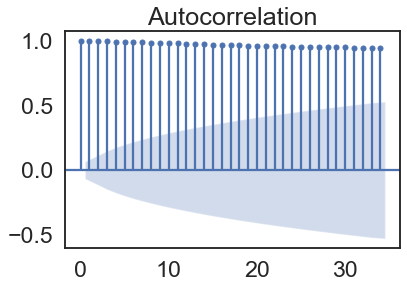

In [23]:
plot_acf(weekly.average[:-1], alpha =0.001);

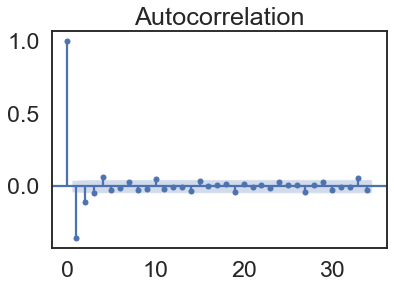

In [24]:
plot_acf(avg_week_log.average[:-1], alpha =0.05);

>These autocorrelation charts demonstrate how when looking at the data with trend and seaonality,each new data point is highly correlated with the point before it even at a very strict alpha level. However, with trend and seasonality removed we see that is only true for only a few lags including 2, 4, 10, and 32. 

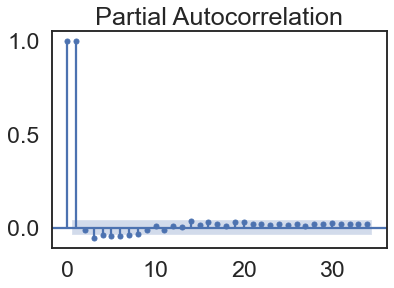

In [25]:
plot_pacf(weekly.average[:-1], alpha=0.05);

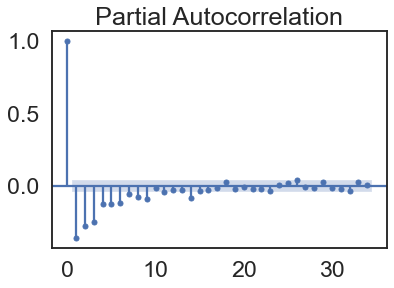

In [26]:
plot_pacf(avg_week_log.average[:-1], alpha=0.05);

These PACF charts demonstrate that when the data is made stationary we see significant lags of 1 thru 9 and 14.

<a name="data_modeling"></a> 
## <span style="color: Thistle;">Data Modeling</span> 

[Back to Top](#btt) 


Describe and justify the process for analyzing or modeling the data.

Questions to consider:

How did you analyze or model the data?
How did you iterate on your initial approach to make it better?
Why are these choices appropriate given the data and the business problem?

<a name="arma"></a> 
### <span style="color: tomato;">ARMA</span> 

[Back to Top](#btt) 

In [71]:
#Import necessary pacakages
import numpy as np
import pandas as pd 
import warnings
warnings.filterwarnings('ignore')
import itertools
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
from matplotlib.collections import LineCollection
from matplotlib.colors import ListedColormap, BoundaryNorm
import seaborn as sns
sns.set_theme(style="white")
%matplotlib inline
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from sklearn.model_selection import GridSearchCV
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.arima_model import ARMA
import statsmodels.api as sm
import pmdarima as pm
from sklearn import metrics
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score 
sm.tsa.statespace.SARIMAX

statsmodels.tsa.statespace.sarimax.SARIMAX

In [73]:
#Split the data
diff_avg_week_train = avg_week_log.average[:round(len(avg_week_log) * 0.8)]
diff_avg_week_test = avg_week_log.average[round(len(avg_week_log) * 0.8):]

In [74]:
#Run base ARMA model 
mod_arma_1 = ARMA(diff_avg_week_train, (3, 1))
res_arma_1 = mod_arma_1.fit(disp=1)
res_arma_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                average   No. Observations:                 1910
Model:                     ARMA(3, 1)   Log Likelihood                9653.170
Method:                       css-mle   S.D. of innovations              0.002
Date:                Thu, 11 Mar 2021   AIC                         -19294.340
Time:                        06:53:18   BIC                         -19261.011
Sample:                    05-25-1975   HQIC                        -19282.074
                         - 12-25-2011                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const          1.134e-06   7.41e-06      0.153      0.878   -1.34e-05    1.57e-05
ar.L1.average     0.2138      0.037      5.840      0.000       0.142       0.286
ar.L2.average    -0.0487      0.029     -1.701      0.089      -0.105       0.007
ar.L3.average    -0.0235      0.029     -0.802      0.423      -0.081       0.034
ma.L1.average    -0.8203      0.029    -28.343      0.000      -0.877      -0.764
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.6151           -2.3278j            2.8333           -0.1535
AR.2            1.6151           +2.3278j            2.8333            0.1535
AR.3           -5.3014           -0.0000j            5.3014           -0.5000
MA.1            1.2191           +0.0000j            1.2191            0.0000
-----------------------------------------------------------------------------
"""

In [75]:
mod_arma_2 = ARMA(diff_avg_week_train, (6, 2))
res_arma_2 = mod_arma_2.fit(disp=1)
res_arma_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                average   No. Observations:                 1910
Model:                     ARMA(6, 2)   Log Likelihood                9657.290
Method:                       css-mle   S.D. of innovations              0.002
Date:                Thu, 11 Mar 2021   AIC                         -19294.581
Time:                        06:55:05   BIC                         -19239.032
Sample:                    05-25-1975   HQIC                        -19274.137
                         - 12-25-2011                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const          1.139e-06   6.96e-06      0.164      0.870   -1.25e-05    1.48e-05
ar.L1.average    -0.3658      1.050     -0.348      0.728      -2.425       1.693
ar.L2.average     0.1324      0.266      0.497      0.619      -0.389       0.654
ar.L3.average    -0.0312      0.047     -0.664      0.507      -0.123       0.061
ar.L4.average     0.0649      0.041      1.599      0.110      -0.015       0.144
ar.L5.average     0.0397      0.081      0.490      0.624      -0.119       0.199
ar.L6.average    -0.0083      0.027     -0.313      0.754      -0.060       0.044
ma.L1.average    -0.2401      1.051     -0.228      0.819      -2.300       1.820
ma.L2.average    -0.5299      0.900     -0.589      0.556      -2.293       1.233
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.7173           -0.2009j            1.7291           -0.4815
AR.2           -1.7173           +0.2009j            1.7291            0.4815
AR.3            0.1581           -1.8734j            1.8801           -0.2366
AR.4            0.1581           +1.8734j            1.8801            0.2366
AR.5            1.8975           -0.0000j            1.8975           -0.0000
AR.6            6.0026           -0.0000j            6.0026           -0.0000
MA.1            1.1658           +0.0000j            1.1658            0.0000
MA.2           -1.6188           +0.0000j            1.6188            0.5000
-----------------------------------------------------------------------------
"""

In [77]:
print('MSE:', mean_squared_error(diff_avg_week_test, res_arma_1.forecast(478)[0]))
print('RMSE:', np.sqrt(mean_squared_error(diff_avg_week_test, res_arma_1.forecast(478)[0])))
print('MAE:', mean_absolute_error(diff_avg_week_test, res_arma_1.forecast(478)[0]))
print('AIC:', res_arma_1.aic)

MSE: 3.5933716699130967e-06
RMSE: 0.0018956190729978153
MAE: 0.0014645857942673464
AIC: -19294.339840167177


In [78]:
print('MSE:', mean_squared_error(diff_avg_week_test, res_arma_1.forecast(478)[0]))
print('RMSE:', np.sqrt(mean_squared_error(diff_avg_week_test, res_arma_1.forecast(478)[0])))
print('MAE:', mean_absolute_error(diff_avg_week_test, res_arma_1.forecast(478)[0]))
print('AIC:', res_arma_2.aic)

MSE: 3.5933716699130967e-06
RMSE: 0.0018956190729978153
MAE: 0.0014645857942673464
AIC: -19294.580525239544


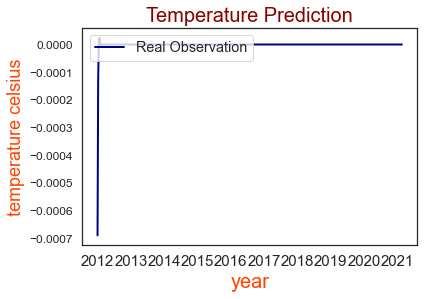

In [83]:
exp_forecaset = np.exp(res_arma_1.forecast(478)[0])
cumsum_forecast = np.cumsum(exp_forecaset) 

avg_log_df = avg_week_log.copy() 
avg_log_df.reset_index(inplace=True)
plt.plot(avg_log_df.Date[-478:], res_arma_1.forecast(478)[0], linewidth=2, color='darkblue')
plt.xlabel('year',fontsize=20, color='orangered')
plt.ylabel('temperature celsius', fontsize=18, color='orangered')
plt.xticks(fontsize=15)
plt.yticks(fontsize=12)
plt.title('Temperature Prediction', fontsize=20, color='darkred')
plt.legend(('Real Observation', 'Prediction'), loc='upper left', fontsize='x-large')

<a name="arima"></a> 
### <span style="color: tomato;">ARIMA</span> 

[Back to Top](#btt) 

In [86]:
diff_avg_week_train_reg = avg_week.average[:round(len(avg_week_log) * 0.95)]
diff_avg_week_test_reg = avg_week.average[round(len(avg_week_log) * 0.95):]
diff_avg_week_arima_reg = ARIMA(diff_avg_week_train_reg, order=(3,1,0))
diff_avg_week_arimafit_reg = diff_avg_week_arima_reg.fit(disp=1)
diff_avg_week_arimafit_reg.forecast(172)[0]

print('MSE:', mean_squared_error(diff_avg_week_test_reg, diff_avg_week_arimafit_reg.forecast(172)[0]))
print('RMSE:', np.sqrt(mean_squared_error(diff_avg_week_test_reg, diff_avg_week_arimafit_reg.forecast(172)[0])))
print('MAE:', mean_absolute_error(diff_avg_week_test_reg, diff_avg_week_arimafit_reg.forecast(172)[0]))
print('AIC:', diff_avg_week_arimafit_reg.aic)

MSE: 23.73066817008729
RMSE: 4.871413364731769
MAE: 4.314831244485564
AIC: 3580.3803620519975


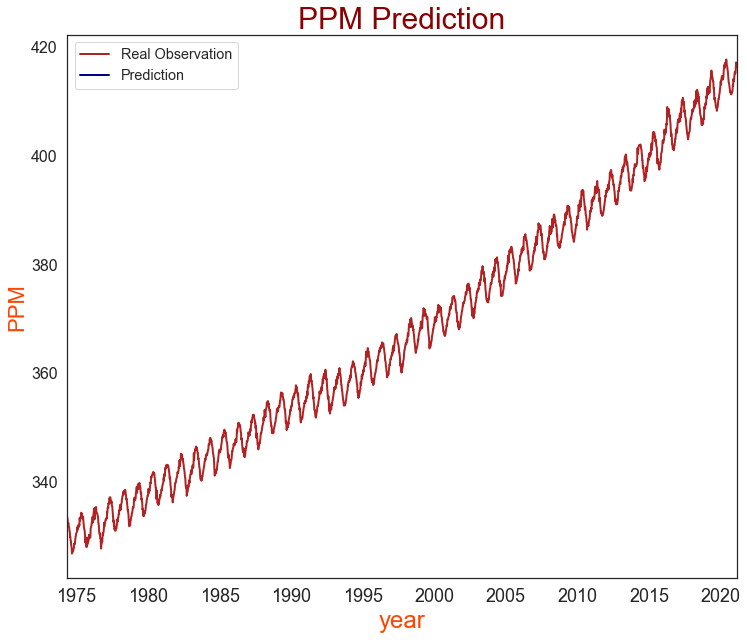

In [87]:
avg_week.plot(figsize=(12,10), linewidth=2, color='firebrick')
plt.plot(avg_week.index[-172:], diff_avg_week_arimafit_reg.forecast(172)[0], linewidth=2, color='darkblue')
plt.xlabel('year',fontsize=24, color='orangered')
plt.ylabel('PPM', fontsize=22, color='orangered')
plt.xticks(fontsize=18)
plt.yticks(fontsize=16)
plt.title('PPM Prediction', fontsize=30, color='darkred')
plt.legend(('Real Observation', 'Prediction'), loc='upper left', fontsize='x-large');

In [89]:
diff_avg_week_arima = ARIMA(diff_avg_week_train, order=(3,1,0))
diff_avg_week_arimafit_1 = diff_avg_week_arima.fit(disp=1) 

diff_avg_week_arima = ARIMA(diff_avg_week_train, order=(6,2,0))
diff_avg_week_arimafit_2 = diff_avg_week_arima.fit(disp=1)

In [90]:
print('MSE:', mean_squared_error(diff_avg_week_test, diff_avg_week_arimafit_1.forecast(478)[0]))
print('RMSE:', np.sqrt(mean_squared_error(diff_avg_week_test, diff_avg_week_arimafit_1.forecast(478)[0])))
print('MAE:', mean_absolute_error(diff_avg_week_test, diff_avg_week_arimafit_1.forecast(478)[0]))
print('AIC:', diff_avg_week_arimafit_1.aic)

MSE: 3.6945482015863617e-06
RMSE: 0.0019221207562446128
MAE: 0.0014982679726747727
AIC: -18283.597927728668


In [91]:
print('MSE:', mean_squared_error(diff_avg_week_test, diff_avg_week_arimafit_2.forecast(478)[0]))
print('RMSE:', np.sqrt(mean_squared_error(diff_avg_week_test, diff_avg_week_arimafit_2.forecast(478)[0])))
print('MAE:', mean_absolute_error(diff_avg_week_test, diff_avg_week_arimafit_2.forecast(478)[0]))
print('AIC:', diff_avg_week_arimafit_2.aic)

MSE: 0.0011177827142079954
RMSE: 0.03343325760687994
MAE: 0.027940122722277392
AIC: -17822.59856822833


<a name="sarimax"></a> 
### <span style="color: tomato;">SARIMAX</span> 

[Back to Top](#btt) 

In [92]:
diff_avg_sarimax_1 = sm.tsa.statespace.SARIMAX(endog = diff_avg_week_train, order=(3,1,0))
diff_avg_sarimaxfit_1 = diff_avg_sarimax_1.fit()
diff_avg_sarimaxfit_1 

diff_avg_sarimax_2 = sm.tsa.statespace.SARIMAX(endog = diff_avg_week_train, order=(6,2,0))
diff_avg_sarimaxfit_2 = diff_avg_sarimax_2.fit()

diff_avg_sarimaxfit_1.forecast(478)
diff_avg_sarimaxfit_2.forecast(478)

2012-01-01    0.001134
2012-01-08    0.001310
2012-01-15    0.001144
2012-01-22    0.000456
2012-01-29    0.001015
                ...   
2021-01-24    0.036740
2021-01-31    0.036817
2021-02-07    0.036893
2021-02-14    0.036969
2021-02-21    0.037045
Freq: W-SUN, Length: 478, dtype: float64

In [93]:
print('MSE:', mean_squared_error(diff_avg_week_test, diff_avg_sarimaxfit_1.forecast(478)))
print('RMSE:', np.sqrt(mean_squared_error(diff_avg_week_test, diff_avg_sarimaxfit_1.forecast(478))))
print('MAE:', mean_absolute_error(diff_avg_week_test, diff_avg_sarimaxfit_1.forecast(478)))

MSE: 3.7422949842613263e-06
RMSE: 0.001934501223639139
MAE: 0.0015112231868105045


In [94]:
print('MSE:', mean_squared_error(diff_avg_week_test, diff_avg_sarimaxfit_2.forecast(478)))
print('RMSE:', np.sqrt(mean_squared_error(diff_avg_week_test, diff_avg_sarimaxfit_2.forecast(478))))
print('MAE:', mean_absolute_error(diff_avg_week_test, diff_avg_sarimaxfit_2.forecast(478)))

MSE: 0.0004710524833108006
RMSE: 0.02170374353218358
MAE: 0.0189480353792372


In [95]:
m_auto = pm.auto_arima(diff_avg_week_train, start_p=1, start_d=1, start_q=1, max_p=10, max_d=5, max_q=10,
                             seasonal = False,
                             d=None, D=None, trace=True,
                             error_action='ignore',  # don't want to know if an order does not work
                             suppress_warnings=True,  # don't want convergence warnings
                             stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=-19277.945, Time=0.29 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-18661.881, Time=0.10 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=-18911.915, Time=0.13 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=-19154.483, Time=0.15 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=-19220.844, Time=0.23 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=-19284.013, Time=0.53 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=-19290.961, Time=0.42 sec
 ARIMA(0,0,3)(0,0,0)[0]             : AIC=-19294.299, Time=0.32 sec
 ARIMA(1,0,3)(0,0,0)[0]             : AIC=-19299.170, Time=0.37 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC=-19297.766, Time=0.38 sec
 ARIMA(1,0,4)(0,0,0)[0]             : AIC=-19296.366, Time=0.31 sec
 ARIMA(0,0,4)(0,0,0)[0]             : AIC=-19294.603, Time=0.34 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=-19289.731, Time=0.37 sec
 ARIMA(2,0,4)(0,0,0)[0]             : AIC=-19297.271, Time=0.44 sec
 ARIM

In [96]:
m_auto.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1910
Model:               SARIMAX(1, 0, 3)   Log Likelihood                9654.585
Date:                Thu, 11 Mar 2021   AIC                         -19299.170
Time:                        07:32:53   BIC                         -19271.396
Sample:                             0   HQIC                        -19288.948
                               - 1910                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6212      0.253     -2.457      0.014      -1.117      -0.126
ma.L1          0.0291      0.250      0.116      0.907      -0.462       0.520
ma.L2         -0.5356      0.159     -3.368      0.001      -0.847      -0.224
ma.L3         -0.1593      0.042     -3.788      0.000      -0.242      -0.077
sigma2      2.374e-06   6.75e-08     35.183      0.000    2.24e-06    2.51e-06
===================================================================================
Ljung-Box (Q):                       45.38   Jarque-Bera (JB):                32.90
Prob(Q):                              0.26   Prob(JB):                         0.00
Heteroskedasticity (H):               0.98   Skew:                            -0.03
Prob(H) (two-sided):                  0.83   Kurtosis:                         3.64
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [97]:
weekly_auto_foca = m_auto.predict(478) 

print('MSE:', mean_squared_error(diff_avg_week_test, weekly_auto_foca))
print('RMSE:', np.sqrt(mean_squared_error(diff_avg_week_test, weekly_auto_foca)))
print('MAE:', mean_absolute_error(diff_avg_week_test, weekly_auto_foca)) 

MSE: 3.5908066387151695e-06
RMSE: 0.0018949423840093846
MAE: 0.0014640629402932585


In [98]:
orderlist = []
mselist = []
rmselist = []
maelist = []
for p in range(1,5):
    for d in range(1,5):
        for q in range(1,5):
            ordernow = (p,d,q)
            m_sarimax_now = sm.tsa.statespace.SARIMAX(endog = diff_avg_week_train, order=ordernow).fit()
            orderlist.append(ordernow)
            maelist.append(mean_absolute_error(diff_avg_week_test, m_sarimax_now.forecast(478)))
            rmselist.append(np.sqrt(mean_squared_error(diff_avg_week_test, m_sarimax_now.forecast(478))))
            mselist.append(mean_squared_error(diff_avg_week_test, m_sarimax_now.forecast(478)))

In [101]:
df_arimax_exo = pd.DataFrame()
df_arimax_exo['order'], df_arimax_exo['mse'], df_arimax_exo['rmse'], df_arimax_exo['mae'] = orderlist, mselist, rmselist, maelist 

arimax_co2_best = sm.tsa.statespace.SARIMAX(endog = diff_avg_week_train, order=(1,1,2), initialization='approximate_diffuse').fit() 

In [103]:
arimax_co2_best.forecast()

2012-01-01    0.000298
Freq: W-SUN, dtype: float64

In [105]:
df.plot(figsize=(12,10), linewidth=2, color='firebrick')
plt.plot(range(2003,2016), arimax_co2_best.forecast(steps=13, exog=co2_test), linewidth=2, color='darkblue')
plt.ylim([6.5,10])
plt.xlabel('year',fontsize=24, color='orangered')
plt.ylabel('temperature celsius', fontsize=22, color='orangered')
plt.xticks(fontsize=18)
plt.yticks(fontsize=16)
plt.title('Temperature Prediction', fontsize=30, color='darkred')
plt.legend(('Real Observation', 'Prediction'), loc='upper left', fontsize='x-large')

NameError: name 'df' is not defined

<a name="evaluation"></a> 
## <span style="color: gold;"> Evaluation </span> 

[Back to Top](#btt)  


Evaluate how well your work solves the stated business problem.

Questions to consider:

How do you interpret the results?
How well does your model fit your data? How much better is this than your baseline model?
How confident are you that your results would generalize beyond the data you have?
How confident are you that this model would benefit the business if put into use?

<a name="conclusion"></a> 
## <span style="color: palegreen;"> Conclusions </span> 

[Back to Top](#btt)  

Provide your conclusions about the work you've done, including any limitations or next steps.

Questions to consider:

What would you recommend the business do as a result of this work?
What are some reasons why your analysis might not fully solve the business problem?
What else could you do in the future to improve this project?